In [28]:
import sys, os
sys.path.append(os.path.abspath("../src"))   # add src folder to path

import pandas as pd
import matplotlib.pyplot as plt
from eval_utils import all_metrics
from models import fit_arima, forecast_arima, fit_prophet, forecast_prophet


In [29]:
df = pd.read_csv("data/processed/RELIANCE.NS_close.csv", index_col=0, parse_dates=True)


In [30]:
df['close'] = pd.to_numeric(df['close'], errors='coerce')
df = df.dropna()

In [31]:
train_n = int(len(df)*0.8)
train = df.iloc[:train_n]['close']
test = df.iloc[train_n:]['close']


c:\Users\bhupe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bhupe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bhupe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bhupe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been pro

Best ARIMA order: (2, 1, 2)


c:\Users\bhupe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\bhupe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


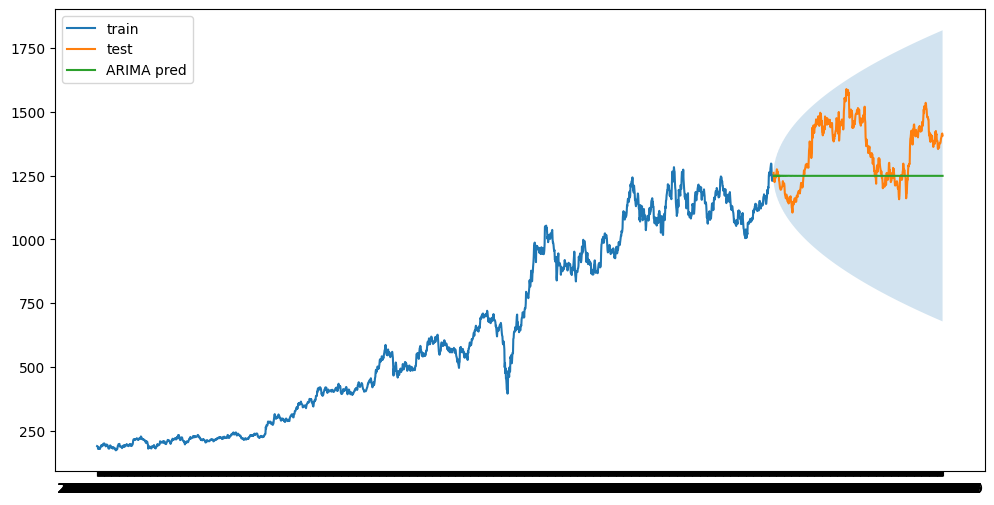

ARIMA metrics: {'MAE': 126.5598187280318, 'RMSE': 153.53923450837212, 'MAPE': 8.970329915085205}


In [32]:
best_order, arima_res = fit_arima(train, p_range=(0,3), d_range=(0,2), q_range=(0,3))
print("Best ARIMA order:", best_order)

pred_mean, pred_ci = forecast_arima(arima_res, steps=len(test))

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='train')
plt.plot(test.index, test, label='test')
plt.plot(pred_mean.index, pred_mean, label='ARIMA pred')
plt.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], alpha=0.2)
plt.legend(); plt.show()

metrics_arima = all_metrics(test.values, pred_mean.values)
print("ARIMA metrics:", metrics_arima)


In [33]:
df_prop = pd.DataFrame({
    'ds': train.index,
    'y': train.values
})

m = fit_prophet(df_prop)
forecast = forecast_prophet(m, periods=len(test))

22:23:38 - cmdstanpy - INFO - Chain [1] start processing
22:23:39 - cmdstanpy - INFO - Chain [1] done processing


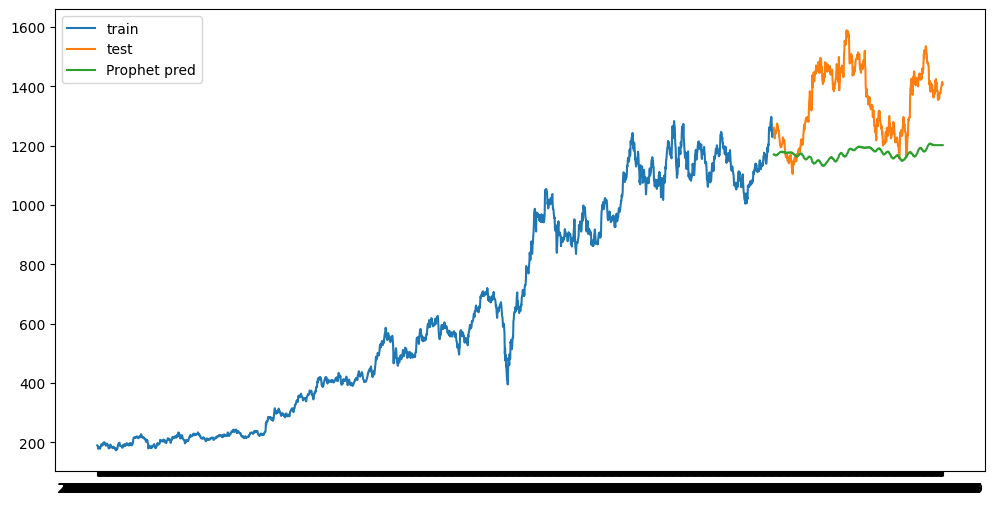

Prophet metrics: {'MAE': 177.83520034127326, 'RMSE': 210.2341559119889, 'MAPE': 12.568428539752702}


In [34]:
yhat = forecast.set_index('ds')['yhat']
fc = yhat.reindex(test.index, method="nearest")   # <- FIX

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='train')
plt.plot(test.index, test, label='test')
plt.plot(fc.index, fc, label='Prophet pred')
plt.legend(); plt.show()

metrics_prophet = all_metrics(test.values, fc.values)
print("Prophet metrics:", metrics_prophet)
